In [1]:
from matplotlib import pyplot as plt
import numpy as np
import statistics as st

In [2]:
def return_section(fn, start, end):
    """
    Return section of data from start to end index given filename 'fn'
    """
    tofData = np.loadtxt(fn,skiprows=1)
    data = np.zeros(len(tofData[:,0]))
    time = np.zeros(len(tofData[:,0]), dtype = int)
    for ind in np.arange(len(tofData[:,0])):
        time[ind] = int(tofData[ind,0])
        data[ind] = tofData[ind,1]
    if end == 1:
        end = len(tofData[:,0])
        print(len(tofData[:,0]))
    dataframe = np.zeros([(end-start), 2])
    dataframe[:,0] = time[start:end]
    dataframe[:,1] = data[start:end]
    return dataframe

In [3]:
def detrend(fn, start, end): #Linear detrend using gradient only over entire file
    df1 = return_section(fn, start, end)
    m, b = np.polyfit(df1[:,0], df1[:,1], 1)
    df1[:,1] = df1[:,1] - m*(df1[:,0] - start)
    return df1

In [4]:
def meansdsilent(df1): #Prints mean and standard deviation of data and returns them as a tuple. Takes 2D dataframe
    mean = st.mean(df1[:,1])
    sd = st.stdev(df1[:,1])
    return mean, sd

In [5]:
def plot_section(fn, start, end, title):
    """
    Print section of data from start to end index given filename 'fn'
    """
    tofData = np.loadtxt(fn,skiprows=1)
    data = np.zeros(len(tofData[:,0]))
    time = np.zeros(len(tofData[:,0]), dtype = int)
    for ind in np.arange(len(tofData[:,0])):
        time[ind] = int(tofData[ind,0])
        data[ind] = tofData[ind,1]
    if end == 1:
        end = len(tofData[:,0])
        print(len(tofData[:,0]))
    plt.plot(time[start:end], data[start:end], 'k')
    plt.xlabel('Time (s)')
    plt.ylabel('Signal in counts per second')
    plt.ylim(min(data[start:end]) - 500, max(data[start:end]) + 500)
    plt.title(title)
    # plt.savefig('aldoxime O3 NO3 ox.svg') ############# export graph in desired format ##########
    plt.show()

In [6]:
def normalize(df, start, end): #normalize dataframe by dividing by the mean of the data in the start:end interval
    stat = meansdsilent(df[start:end])
    length = len(df[:,0])
    data = np.zeros(length)
    time = np.zeros(length)
    for ind in np.arange(length):
        time[ind] = int(df[ind,0])
        data[ind] = df[ind,1] / stat[0]
    dataframe = np.zeros([length, 2])
    dataframe[:,0] = time[:]
    dataframe[:,1] = data[:]
    return dataframe

In [7]:
"""
plots, aligns, and scales 3 normalized data dataframes dfn1-3 by offsets ofs1-3, scale factors scale1-3, and colors c1-3
"""
def triplot(dfn1,ofs1,scale1,start1,end1,c1,dfn2,ofs2,scale2,start2,end2,c2,dfn3,ofs3,scale3,start3,end3,c3): 
    base = dfn3[:,0] #set which dataset time axis is used for the joint plot
    plt.plot((dfn1[:,0] - start1) * scale1, dfn1[:,1] + ofs1, c1, (dfn2[:,0] - start2) * scale2, 
             dfn2[:,1] + ofs2, c2, (dfn3[:,0] - start3) * scale3, dfn3[:,1] + ofs3, c3)
    plt.xlabel('Time', fontsize=15)
    plt.ylabel('Normalized signal', fontsize=15)
    plt.xticks([])
    plt.tick_params(axis='y', labelsize=12)
    plt.box(False) #Hide frame around plot
    plt.tight_layout()
#     plt.savefig('VOCUS Aldoxime B-pinene Ocimene NOx ox.svg', edgecolor='none')
#     plt.savefig('VOCUS Aldoxime B-pinene Ocimene NOx ox.png', edgecolor='none')
    plt.show()

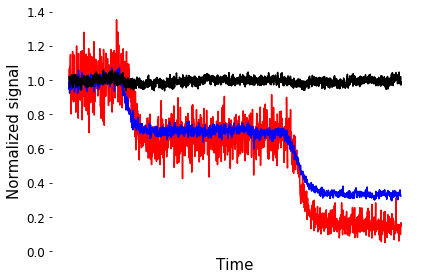

In [8]:
"""
Tri plot of individual aldoxime, b-pinene, and ocimene VOCUS runs
"""
#aldoxime
start1 = 1155
end1 = 3654
df1 = detrend('aldoxime_20210423_VOCUS_PTR_OPall2n_Blend9_NO3_ox_Data_n_2021.05.10_16h50m03s_igor.txt', start1, end1)
dfn1 = normalize(df1, 1100, 1200)
#b-pinene
start2 = 350
end2 = 1750
df2 = return_section('b-pinene_20210512_VOCUS_OPall2n_VOCs_NO3_ox_Data_n_2021.05.12_17h08m26s_igor.txt', start2, end2)
dfn2 = normalize(df2, 0, 200)
#ocimene
start3 = 50
end3 = 1450
df3 = return_section('ocimene_20210512_VOCUS_OPall2n_VOCs_NO3_ox_Data_n_2021.05.12_19h36m49s_igor.txt', start3, end3)
dfn3 = normalize(df3, 150, 240)
triplot(dfn2,0,1, start2, end2, 'r', dfn3,0,1, start3, end3, 'b', dfn1,0,(700/1250), start1, end1, 'k')